TBD: Hader

# Visulizing spatial information

Function `geom_livemap()` enables a researcher to visualize geospatial information on interactive map.

When building interactive geospatial visualizations with *Lets-Plot* the visualisation workflow remains the 
same as when building a regular `ggplot2` plot.

However, `geom_livemap()` creates an interactive base-map super-layer and certain limitations do apply 
comparing to a regular `ggplot2` geom-layer:

* `geom_livemap()` must be added as a 1-st layer in plot;
* Maximum one `geom_livemap()` layer is alloed per plot;
* Not any type of *geometry* can be combined with interactive map layer in one plot;
* Internet connection to *map tiles provider* is required.

The following `ggplot2` geometry can be used with interactive maps:

* `geom_point`
* `geom_rect`
* `geom_path`
* `geom_polygon`
* `geom_segment`
* `geom_text`
* `geom_tile`
* `geom_vline`, `geon_hline`
* `geom_bin2d`
* `geom_contour`, `geom_contourf`
* `geom_density2d`, `geom_density2df`



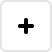
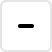
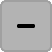
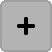
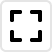
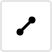
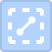

In [1]:
from lets_plot import *

LetsPlot.setup_html()

## Configuring map tile server

*Lets-PLot* can fetch raster tiles from a 3d-party ZXY-type [tile servers](https://wiki.openstreetmap.org/wiki/Tile_servers).

Lets use *Wikimedia Maps* provided by [Wikimedia Foundation](https://foundation.wikimedia.org/wiki/Maps_Terms_of_Use) as our tile server.

In [2]:
LetsPlot.set(maptiles_zxy(url='https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}@2x.png'))

### The First Map

In [3]:
p = ggplot() + ggsize(500, 300)


# Add an empty interactive map layer.
p + geom_livemap()

#### Initial location and zoom level

The default initial location and zoom level shown on the figure above 
can be adjusted using `location` and `zoom` parameters.

In [4]:
# In Lets-Plot coordinates are always encoded as: `longitude` - first and `latitude` - second
p + geom_livemap(location=[29.737809, 60.003151], zoom=11)

## Adding 'geometries'

#### geom_hline(), geom_vline()

Map's initial `location` and `zoom` parameters are not used very often because map 
automatically chooses its initial viewport so that all added *geometries* are visible.

But the `horizontal` and `vertical` lines are exception because they do not have determined bounds. In this case its often necessary to set the desired location and zoom value manually.

In [5]:
lons = [-73 + x for x in range(4)]
lats = [41.5 + 0.5 * y for y in range(4)]

p + geom_livemap(location=[-71.94375, 42.572511], zoom=7)\
  + geom_hline(aes(yintercept=lats), color='red', linetype=2)\
  + geom_vline(aes(xintercept=lons), color='dark_green', linetype=4)

#### geom_path()

In [6]:
path = {
    'lon': [11.620273, -71.075466, -121.898220, -96.761501], 
    'lat': [48.169211, 42.383651, 37.362240, 32.797371]
}
p + geom_livemap()\
  + geom_path(data=path, mapping=aes(x='lon', y='lat'), size=1, color='magenta')


In [7]:
p + geom_livemap(geodesic=False)\
  + geom_path(data=path, mapping=aes(x='lon', y='lat'), size=1, color='magenta')

#### geom_point()

In [8]:
p + geom_livemap()\
  + geom_path(data=path, mapping=aes(x='lon', y='lat'), size=1, color='magenta')\
  + geom_point(data=path, mapping=aes(x='lon', y='lat'), shape=21, size=7, fill='yellow')


#### geom_segment()

In [9]:
data = dict(
    x0 = [-97.8,  22.6], y0 = [41.2, -1.3],
    x1 = [ 19.3, -64.5], y1 = [18.7, -15.9],
    Direction = ['east', 'west']
)
p + geom_livemap()\
  + geom_segment(data=data, mapping=aes(x='x0', y='y0', xend='x1', yend='y1', color='Direction'), size=1, linetype=2)

#### geom_text()

In [10]:
data = {
    'label': ["==    0 ==>", "==   60 ==>", "==  120 ==>", "==  180 ==>", "== -60 ==>", "== -120 ==>"],
    'angle': [0, 60, 120, 180, -60, -120],
}

p + geom_livemap() + geom_point(x=0, y=0, size=140, color='white', alpha=0.6)\
  + geom_text(aes(label = 'label', angle='angle'), data=data,
              x=0, y=0, 
              hjust = "left", vjust = "center",
              size=10, family='monospace', color='red')

#### geom_polygon()

In [11]:
UK = {
    'lon': [-2.598046, -2.378320, -2.466210, -3.169335, -1.938867, 
            -0.576562, -0.312890, 0.873632, 0.082617, -2.598046], 
    'lat': [51.030349, 51.797754, 53.945750, 54.561879, 55.193929, 
            53.816229, 52.924809, 52.525588, 51.113188, 51.030349]
}
Germany = {
    'lon': [7.685156, 9.926367, 13.661718, 14.101171, 11.464453, 
            12.870703, 8.564062, 8.651953, 6.806250, 6.938085, 7.685156], 
    'lat': [53.294124, 54.049078, 53.608160, 51.305902, 50.221916, 
            48.679365, 48.007575, 49.485266, 50.024691, 51.552493, 53.294124]
}
France = {
    'lon': [-2.246484, 2.367773, 7.245703, 5.268164, 6.586523, 
            2.895117, 2.279882, -0.532617, -0.356835, -2.246484], 
    'lat': [48.095702, 50.586036, 48.795295, 46.365136, 44.169607, 
            43.663114, 43.088157, 43.631315, 46.516550, 48.095702]
}
polygons = dict(
    lon = UK['lon'] + Germany['lon'] + France['lon'],
    lat = UK['lat'] + Germany['lat'] + France['lat'],
    country = ['UK' for _ in UK['lon']] + ['Germany' for _ in Germany['lon']] + ['France' for _ in France['lon']]
)

p + geom_livemap()\
  + geom_polygon(aes('lon', 'lat'),
                 data=polygons, 
                 fill='green', 
                 alpha=0.3)


#### geom_rect()

In [12]:
bounds = dict(
    lon0 = [min(UK['lon']), min(Germany['lon']), min(France['lon'])],
    lon1 = [max(UK['lon']), max(Germany['lon']), max(France['lon'])],
    lat0 = [min(UK['lat']), min(Germany['lat']), min(France['lat'])],
    lat1 = [max(UK['lat']), max(Germany['lat']), max(France['lat'])],
    country = ['UK', 'Germany', 'France']
)

p + geom_livemap()\
  + geom_rect(aes(xmin='lon0', ymin='lat0', xmax='lon1', ymax='lat1', fill='country'),
              data=bounds, 
              alpha = 0.3) 

## Data on Map

In the examples above we've seen already how values in input data series can be mapped to aesthetic values on map.
For the instance, values in `country` series were mapped to `fill` color in "geom_rect()" example.

Lets plot another data - the countries population:

In [13]:
pop_UK = 66.65e6
pop_Germany = 83.02e6
pop_France = 66.99e6

#### Proportional symbols map

In [14]:
# Create data frame containing countries name, centroid and population.
centroids = dict(
    lon = [(max(xs) - min(xs)) / 2 + min(xs) for xs in [UK['lon'], Germany['lon'], France['lon']]],
    lat = [(max(ys) - min(ys)) / 2 + min(ys)for ys in [UK['lat'], Germany['lat'], France['lat']]],
    country = ['UK', 'Germany', 'France'],
    population = [pop_UK, pop_Germany, pop_France]    
)

p + geom_livemap() + scale_size(range=[10, 50], guide='none')\
  + geom_point(aes('lon', 'lat', color='country', size='population'),
               data=centroids, 
               alpha = 0.8) 


#### Choropleth map

In [15]:
# Create data frame containing countries name, boundary polygon and population.
polygons_and_pop = polygons.copy()
polygons_and_pop['population'] = [pop_UK for _ in UK['lon']]\
                                + [pop_Germany for _ in Germany['lon']]\
                                + [pop_France for _ in France['lon']]

# Note that in this case it's necessary to define `group` aesthetic.
# Otherwise `geom_polygon` will not be able to split the data into tree "data points".
p + geom_livemap()\
  + geom_polygon(aes('lon', 'lat', fill='population', group='country'), 
                 data=polygons_and_pop, 
                 alpha=0.3)


#### Choropleth map (geopandas and `map_join`)

The dataframe format used in the previouse `Choropleth` example is not the most 
convenient way to represent data with geospatial boundaries because each
real data-point is duplicated for each vertex in the corresponding polygon.

More convenient would be to store data-points and their geospatial boundaries in 
separate data structures.

In this example let's use `geopandas.GeoDataFrame` to store the boundaries.

In [16]:
# Data-points.
population = dict(
    country = ["UK", "Germany", "France"],
    population = [pop_UK, pop_Germany, pop_France]
)

In [17]:
from geopandas import GeoDataFrame, points_from_xy
from shapely.geometry import Polygon, LinearRing

# GeoDataFrame with boundaries.
polygons_gdf = GeoDataFrame(
    data=dict(
        name = ['UK', 'Germany','France']
    ),
    geometry=[
        Polygon(tuple(zip(UK['lon'], UK['lat']))),
        Polygon(tuple(zip(Germany['lon'], Germany['lat']))),
        Polygon(tuple(zip(France['lon'], France['lat'])))
    ]
)

# Use `map` parameter to pass `boundaries` and 
# `map_join` parameter to tell `geom_polygon` how to merge "data" and "map".
p + geom_livemap()\
  + geom_polygon(aes(fill='population'), 
                 data=population, 
                 map=polygons_gdf, 
                 map_join=['country','name'],
                 alpha=0.3)

## Geometries with built-in statistical transformation

Adding these geometry layers is not different from regular plots.

#### geom_bin2d()

In [18]:
import numpy as np
np.random.seed(32)
x, y = np.random.multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]], size=50).T
p + geom_livemap() + scale_fill_gradient('white', 'darkgreen')\
  + geom_bin2d(aes(x * 5, y * 5, fill='..density..'), bins=[7, 7], alpha=0.5)

#### geom_density2df()

In [19]:
p + geom_livemap() + scale_fill_gradient('white', 'darkgreen')\
  + geom_density2df(aes(x * 5, y * 5, fill='..level..'), alpha=0.5)